# Object-Oriented Programming in Python on DataCamp  exercises:
# Chapter 2 (Inheritance and Polymorphism):

## 1.Class-level attributes
Class attributes store data that is shared among all the class instances. They are assigned values in the class body, and are referred to using the ClassName. syntax rather than self. syntax when used in methods.

In this exercise, you will be a game developer working on a game that will have several players moving on a grid and interacting with each other. As the first step, you want to define a Player class that will just move along a straight line. Player will have a position attribute and a move() method. The grid is limited, so the position of Player will have a maximal value.
### instructions:
#### 1/3:
* Define a class Player that has:
* A class attribute MAX_POSITION with value 10.
* The \__init__() method that sets the position instance attribute to 0.
* Print Player.MAX_POSITION.
* Create a Player object p and print its MAX_POSITION.

##### solution:

In [ ]:
# Create a Player class
class Player:
    MAX_POSITION=10
    def __init__(self):
        self.position=0        

# Print Player.MAX_POSITION       
print(Player.MAX_POSITION)

# Create a player p and print its MAX_POSITITON
p=Player()
print(p.MAX_POSITION)

#### 2/2:
Add a move() method with a steps parameter such that:

* if position plus steps is less than MAX_POSITION, then add steps to position and assign the result back to position;
* otherwise, set position to MAX_POSITION.
Take a look at the console for a visualization!
##### solution:

In [ ]:
class Player:
    MAX_POSITION = 10
    
    def __init__(self):
        self.position = 0

    # Add a move() method with steps parameter
    def move(self,steps):
        if (self.position+steps<Player.MAX_POSITION):
            self.position+=steps
        else:
            self.position=Player.MAX_POSITION
       
    # This method provides a rudimentary visualization in the console    
    def draw(self):
        drawing = "-" * self.position + "|" +"-"*(Player.MAX_POSITION - self.position)
        print(drawing)

p = Player(); p.draw()
p.move(4); p.draw()
p.move(5); p.draw()
p.move(3); p.draw()

## 2.Changing class attributes
You learned how to define class attributes and how to access them from class instances. So what will happen if you try to assign another value to a class attribute when accessing it from an instance? The answer is not as simple as you might think!

The Player class from the previous exercise is pre-defined. Recall that it has a position instance attribute, and MAX_SPEED and MAX_POSITION class attributes. The initial value of MAX_SPEED is 3.
### instructions:
#### 1/2:
* Create two Player objects p1 and p2.
* Print p1.MAX_SPEED and p2.MAX_SPEED.
* Assign 7 to p1.MAX_SPEED.
* Print p1.MAX_SPEED and p2.MAX_SPEED again.
* Print Player.MAX_SPEED.
* Examine the output carefully.
##### solution:

In [ ]:
# Create Players p1 and p2
p1=Player()
p2=Player()

print("MAX_SPEED of p1 and p2 before assignment:")
# Print p1.MAX_SPEED and p2.MAX_SPEED
print(p1.MAX_SPEED)
print(p2.MAX_SPEED)

# Assign 7 to p1.MAX_SPEED
p1.MAX_SPEED=7

print("MAX_SPEED of p1 and p2 after assignment:")
# Print p1.MAX_SPEED and p2.MAX_SPEED
print(p1.MAX_SPEED)
print(p2.MAX_SPEED)

print("MAX_SPEED of Player:")
# Print Player.MAX_SPEED
print(Player.MAX_SPEED)

#### 2/2:
Even though MAX_SPEED is shared across instances, assigning 7 to p1.MAX_SPEED didn't change the value of MAX_SPEED in p2, or in the Player class.

So what happened? In fact, Python created a new instance attribute in p1, also called it MAX_SPEED, and assigned 7 to it, without touching the class attribute.

Now let's change the class attribute value for real.

* Modify the assignment to assign 7 to Player.MAX_SPEED instead.

##### solution:

In [ ]:
# Create Players p1 and p2
p1, p2 = Player(), Player()

print("MAX_SPEED of p1 and p2 before assignment:")
# Print p1.MAX_SPEED and p2.MAX_SPEED
print(p1.MAX_SPEED)
print(p2.MAX_SPEED)

# ---MODIFY THIS LINE--- 
Player.MAX_SPEED = 7

print("MAX_SPEED of p1 and p2 after assignment:")
# Print p1.MAX_SPEED and p2.MAX_SPEED
print(p1.MAX_SPEED)
print(p2.MAX_SPEED)

print("MAX_SPEED of Player:")
# Print Player.MAX_SPEED
print(Player.MAX_SPEED)

## 3.Alternative constructors
Python allows you to define class methods as well, using the @classmethod decorator and a special first argument cls. The main use of class methods is defining methods that return an instance of the class, but aren't using the same code as \__init__().

For example, you are developing a time series package and want to define your own class for working with dates, BetterDate. The attributes of the class will be year, month, and day. You want to have a constructor that creates BetterDate objects given the values for year, month, and day, but you also want to be able to create BetterDate objects from strings like 2020-04-30.

You might find the following functions useful:

* .split("-") method will split a string at"-" into an array, e.g. "2020-04-30".split("-") returns ["2020", "04", "30"],
* int() will convert a string into a number, e.g. int("2019") is 2019 .
### instructions:
#### 1/2:
Add a class method from_str() that:

* accepts a string datestr of the format'YYYY-MM-DD',
* splits datestr and converts each part into an integer,
* returns an instance of the class with the attributes set to the values extracted from datestr.

##### solution:

In [ ]:
class BetterDate:    
    # Constructor
    def __init__(self, year, month, day):
      # Recall that Python allows multiple variable assignments in one line
      self.year, self.month, self.day = year, month, day
    
    # Define a class method from_str
    @classmethod
    def from_str(cls, datestr):
        # Split the string at "-" and convert each part to integer
        parts = datestr.split("-")
        year, month, day = int(parts[0]), int(parts[1]), int(parts[2])
        # Return the class instance
        return BetterDate(year, month, day)
        
bd = BetterDate.from_str('2020-04-30')   
print(bd.year)
print(bd.month)
print(bd.day)

#### 2/2:
For compatibility, you also want to be able to convert a datetime object into a BetterDate object.

* Add a class method from_datetime() that accepts a datetime object as the argument, and uses its attributes .year, .month and .day to create a BetterDate object with the same attribute values.
##### solution:

In [ ]:
# import datetime from datetime
from datetime import datetime

class BetterDate:
    def __init__(self, year, month, day):
      self.year, self.month, self.day = year, month, day
      
    @classmethod
    def from_str(cls, datestr):
        year, month, day = map(int, datestr.split("-"))
        return cls(year, month, day)
      
    # Define a class method from_datetime accepting a datetime object
    @classmethod
    def from_datetime(cls,date_time):
        year, month, day = date_time.year , date_time.month, date_time.day
        return cls(year, month, day)

# You should be able to run the code below with no errors: 
today = datetime.today()     
bd = BetterDate.from_datetime(today)   
print(bd.year)
print(bd.month)
print(bd.day)

## 4.Understanding inheritance
Inheritance is a powerful tool of object-oriented languages that allows you to customize functionality of existing classes without having to re-implement methods from scratch.

In this exercise you'll check your understanding of the basics of inheritance. In the questions, we'll make use of the following two classes:

class Counter:

    def __init__(self, count):
       self.count = count

    def add_counts(self, n):
       self.count += n

class Indexer(Counter):
    
    pass

### instructions:
Classify the cards into the correct buckets. Are the statements true or false?
##### solution:

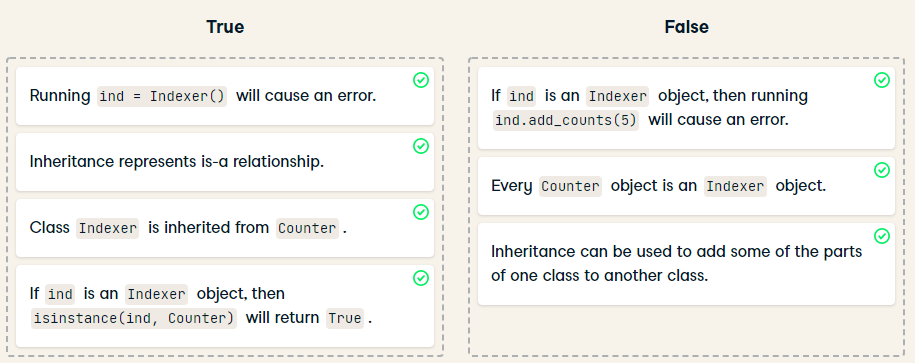

## 5. Create a subclass
The purpose of child classes -- or sub-classes, as they are usually called - is to customize and extend functionality of the parent class.

Recall the Employee class from earlier in the course. In most organizations, managers enjoy more privileges and more responsibilities than a regular employee. So it would make sense to introduce a Manager class that has more functionality than Employee.

But a Manager is still an employee, so the Manager class should be inherited from the Employee class.
### instructions:
#### 1/2:
* Add an empty Manager class that is inherited from Employee.
* Create an object mng of the Manager class with the name Debbie Lashko and salary 86500.
* Print the name of mng.
##### solution:

In [ ]:
class Employee:
  MIN_SALARY = 30000    

  def __init__(self, name, salary=MIN_SALARY):
      self.name = name
      if salary >= Employee.MIN_SALARY:
        self.salary = salary
      else:
        self.salary = Employee.MIN_SALARY
        
  def give_raise(self, amount):
      self.salary += amount      
        
# Define a new class Manager inheriting from Employee
class Manager(Employee):
  pass

# Define a Manager object
mng = Manager("Debbie Lashko",86500)

# Print mng's name
print(mng.name)

#### 2/2:
* Remove the pass statement and add a display() method to the Manager class that just prints the string "Manager" followed by the full name, e.g. "Manager Katie Flatcher"
* Call the .display() method from the mnginstance.
##### solution:

In [ ]:
class Employee:
  MIN_SALARY = 30000    

  def __init__(self, name, salary=MIN_SALARY):
      self.name = name
      if salary >= Employee.MIN_SALARY:
        self.salary = salary
      else:
        self.salary = Employee.MIN_SALARY
  def give_raise(self, amount):
    self.salary += amount      
        
# MODIFY Manager class and add a display method
class Manager(Employee):
  def display(self):
    print("Manager",self.name)

mng = Manager("Debbie Lashko", 86500)
print(mng.name)

# Call mng.display()
mng.display()

## 6. Method inheritance
Inheritance is powerful because it allows us to reuse and customize code without rewriting existing code. By calling methods of the parent class within the child class, we reuse all the code in those methods, making our code concise and manageable.

In this exercise, you'll continue working with the Manager class that is inherited from the Employee class. You'll add new data to the class, and customize the give_raise() method from Chapter 1 to increase the manager's raise amount by a bonus percentage whenever they are given a raise.

A simplified version of the Employee class, as well as the beginning of the Manager class from the previous lesson is provided for you in the script pane.
### instructions:
#### 1/2:
Add a constructor to Manager that:

* accepts name, salary (default 50000), and project (default None)
* calls the constructor of the Employee class with the name and salary parameters,
* creates a project attribute and sets it to the project parameter.
##### solution:

In [ ]:
class Employee:
    def __init__(self, name, salary=30000):
        self.name = name
        self.salary = salary

    def give_raise(self, amount):
        self.salary += amount

        
class Manager(Employee):
  # Add a constructor 
    def __init__(self, name, salary=50000, project=None):

        # Call the parent's constructor   
        Employee.__init__(self, name, salary)

        # Assign project attribute
        self.project=project  

  
    def display(self):
        print("Manager ", self.name)

#### 2/2:
Add a give_raise() method to Manager that:

* accepts the same parameters as Employee.give_raise(), plus a bonus parameter with the default value of 1.05 (bonus of 5%),
* multiplies amount by bonus,
* uses the Employee's method to raise salary by that product.
##### solution:

In [ ]:
class Employee:
    def __init__(self, name, salary=30000):
        self.name = name
        self.salary = salary

    def give_raise(self, amount):
        self.salary += amount

        
class Manager(Employee):
    def display(self):
        print("Manager ", self.name)

    def __init__(self, name, salary=50000, project=None):
        Employee.__init__(self, name, salary)
        self.project = project

    # Add a give_raise method
    def give_raise(self,amount,bonus=1.05):
        Employee.give_raise(self,amount*bonus)


    
    
mngr = Manager("Ashta Dunbar", 78500)
mngr.give_raise(1000)
print(mngr.salary)
mngr.give_raise(2000, bonus=1.03)
print(mngr.salary)

## 7. Inheritance of class attributes
In the beginning of this chapter, you learned about class attributes and methods that are shared among all the instances of a class. How do they work with inheritance?

In this exercise, you'll create subclasses of the Player class from the first lesson of the chapter, and explore the inheritance of class attributes and methods.

The Player class has been defined for you. Recall that the Player class had two class-level attributes: MAX_POSITION and MAX_SPEED, with default values 10 and 3.
### instructions:
#### 1/2:
* Create a class Racer inherited from Player,
* Assign 5 to MAX_SPEED in the body of the class.
* Create a Player object p and a Racer object r (no arguments needed for the constructor).

Examine the printouts carefully. Next step is a quiz!
##### solution:

In [ ]:
# Create a Racer class and set MAX_SPEED to 5
class Racer(Player):
    MAX_SPEED=5
 
# Create a Player and a Racer objects
p = Player()
r = Racer()

print("p.MAX_SPEED = ", p.MAX_SPEED)
print("r.MAX_SPEED = ", r.MAX_SPEED)

print("p.MAX_POSITION = ", p.MAX_POSITION)
print("r.MAX_POSITION = ", r.MAX_POSITION)

#### 2/2:
Question:   
Which of the following statements about inheritance of class attributes is correct?
##### solution:

Class attributes CAN be inherited, and the value of class attributes CAN be overwritten in the child class

## 8. Customizing a DataFrame
In your company, any data has to come with a timestamp recording when the dataset was created, to make sure that outdated information is not being used. You would like to use pandas DataFrames for processing data, but you would need to customize the class to allow for the use of timestamps.

In this exercise, you will implement a small LoggedDF class that inherits from a regular pandas DataFrame but has a created_at attribute storing the timestamp. You will then augment the standard to_csv() method to always include a column storing the creation date.

Tip: all DataFrame methods have many parameters, and it is not sustainable to copy all of them for each method you're customizing. The trick is to use variable-length arguments \*args and \*\*kwargsto catch all of them.
### instructions:
#### 1/2:
* Import pandas as pd.
* Define LoggedDF class inherited from pd.DataFrame.
* Define a constructor with arguments \*args and \*\*kwargs that:
    * calls the pd.DataFrame constructor with the same arguments,
    * assigns datetime.today() to self.created_at.
##### solution:

In [ ]:
# Import pandas as pd
import pandas as pd

# Define LoggedDF inherited from pd.DataFrame and add the constructor
class LoggedDF(pd.DataFrame):
    def __init__(self,*args,**kwargs):
        pd.DataFrame.__init__(self,*args,**kwargs)
        self.created_at=datetime.today()
    
    
ldf = LoggedDF({"col1": [1,2], "col2": [3,4]})
print(ldf.values)
print(ldf.created_at)

#### 2/2:
* Add a to_csv() method to LoggedDF that:
* copies self to a temporary DataFrame using .copy(),
* creates a new column created_at in the temporary DataFrame and fills it with self.created_at
* calls pd.DataFrame.to_csv() on the temporary variable.
##### solution:

In [ ]:
# Import pandas as pd
import pandas as pd

# Define LoggedDF inherited from pd.DataFrame and add the constructor
class LoggedDF(pd.DataFrame):
  
  def __init__(self, *args, **kwargs):
    pd.DataFrame.__init__(self, *args, **kwargs)
    self.created_at = datetime.today()
    
  def to_csv(self, *args, **kwargs):
    # Copy self to a temporary DataFrame
    temp = self.copy()
    
    # Create a new column filled with self.created_at
    temp["created_at"] = self.created_at
    
    # Call pd.DataFrame.to_csv on temp, passing in *args and **kwargs
    pd.DataFrame.to_csv(temp, *args, **kwargs)